1. Are those with children more likely to feel stress than adults without dependences?
2. How does the number of dependencies and their age group affect stress levels in parents/head of household (HoH)?
3. Do stress levels differ between male and female population?
4. Do stress levels differ between male and female parents?


PHQ4_1-4 - Patient health questionnaire, response scale of 1-4 for frequency
1. Little interest or pleasure in doing things
2. Feeling down, depressed, or hopeless
3. Feeling nervous, anxious, or on edge
4. Not being able to stop or control worrying

    Recoded answers:
        1. Not at all
        2. Several days
        3. More than half the days
        4. Nearly everyday
        
child_age_1-5 - Number of children within the 5 age groups
1. 0-2
2. 3-11
3. 12-18
4. 19+
5. N/A


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option("display.max.columns", None)
sns.set_style("darkgrid")

In [49]:
ucl_data_org = pd.read_csv('covid19tracker_recoded.csv')

In [50]:
ucl_data_org.head()

,state,endtime,gender,age,household_size,household_children,child_age_1,child_age_2,child_age_3,child_age_4,child_age_5,child_education_1,child_education_2,child_education_3,child_education_4,i10_health,i11_health,r1_1,WCRV_4,employment_status,cantril_ladder,PHQ4_1,PHQ4_2,PHQ4_3,PHQ4_4,CORE_B2_4,w4_1,w4_2,w4_3,w4_4,w4_5,w4_6,w4_7,w4_8,w4_9,w4_10,w4_11,w4_99,w4b,employment_status.cat,PHQ4_sum,child_education_sum
0,California,02/04/2020 08:11,Female,33,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,NaN,NaN,Not working,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1,Pennsylvania,02/04/2020 08:12,Male,38,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,Full time employment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2,Florida,02/04/2020 08:15,Female,48,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,Full time employment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,California,02/04/2020 08:15,Male,31,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,Unemployed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,Florida,02/04/2020 08:15,Female,69,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,Retired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
ucl_data_org.columns

Index(['state', 'endtime', 'gender', 'age', 'household_size',
       'household_children', 'child_age_1', 'child_age_2', 'child_age_3',
       'child_age_4', 'child_age_5', 'child_education_1', 'child_education_2',
       'child_education_3', 'child_education_4', 'i10_health', 'i11_health',
       'r1_1', 'WCRV_4', 'employment_status', 'cantril_ladder', 'PHQ4_1',
       'PHQ4_2', 'PHQ4_3', 'PHQ4_4', 'CORE_B2_4', 'w4_1', 'w4_2', 'w4_3',
       'w4_4', 'w4_5', 'w4_6', 'w4_7', 'w4_8', 'w4_9', 'w4_10', 'w4_11',
       'w4_99', 'w4b', 'employment_status.cat', 'PHQ4_sum',
       'child_education_sum'],
      dtype='object')

In [52]:
ucl_data = ucl_data_org[['state', 'endtime', 'gender', 'age', 'household_size',
       'household_children', 'child_age_1', 'child_age_2', 'child_age_3',
       'child_age_4', 'child_age_5', 'cantril_ladder', 'PHQ4_1',
       'PHQ4_2', 'PHQ4_3', 'PHQ4_4', 'PHQ4_sum']]
ucl_data = ucl_data[ucl_data['PHQ4_sum'].notna()]
ucl_data = ucl_data[ucl_data['household_size'].notna()]
ucl_data = ucl_data[ucl_data['household_children'].notna()]

ucl_data

,state,endtime,gender,age,household_size,household_children,child_age_1,child_age_2,child_age_3,child_age_4,child_age_5,cantril_ladder,PHQ4_1,PHQ4_2,PHQ4_3,PHQ4_4,PHQ4_sum
4976,Georgia,30/04/2020 16:33,Male,40,3.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,4.0,2.0,1.0,3.0,10.0
4977,New Jersey,30/04/2020 16:31,Female,62,3.0,0.0,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,2.0,1.0,6.0
4978,Indiana,30/04/2020 16:32,Female,61,2.0,0.0,NaN,NaN,NaN,NaN,NaN,9.0,1.0,1.0,1.0,1.0,4.0
4979,Virginia,30/04/2020 16:34,Female,60,2.0,0.0,NaN,NaN,NaN,NaN,NaN,9.0,2.0,1.0,1.0,1.0,5.0
4980,Michigan,30/04/2020 16:34,Female,37,2.0,0.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.0,3.0,3.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31914,Florida,14/09/2021 22:46,Female,26,4.0,0.0,NaN,NaN,NaN,NaN,NaN,5.0,2.0,2.0,4.0,4.0,12.0
31919,New York,14/09/2021 16:32,Male,44,1.0,0.0,NaN,NaN,NaN,NaN,NaN,5.0,1.0,1.0,1.0,1.0,4.0
31920,Rhode Island,14/09/2021 23:30,Male,30,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,2.0,2.0,4.0,4.0,12.0
31923,Connecticut,16/09/2021 00:50,Female,37,4.0,2.0,1.0,0.0,0.0,0.0,0.0,8.0,3.0,1.0,3.0,3.0,10.0


In [53]:
ucl_data['household_children'].value_counts(normalize=True)

0.0    0.677153
1.0    0.126529
2.0    0.115403
3.0    0.044681
4.0    0.020622
5.0    0.015612
Name: household_children, dtype: float64

In [54]:
ucl_data['parent'] = np.where(ucl_data['household_children'] > 0, 1, 0)
ucl_data

,state,endtime,gender,age,household_size,household_children,child_age_1,child_age_2,child_age_3,child_age_4,child_age_5,cantril_ladder,PHQ4_1,PHQ4_2,PHQ4_3,PHQ4_4,PHQ4_sum,parent
4976,Georgia,30/04/2020 16:33,Male,40,3.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,4.0,2.0,1.0,3.0,10.0,1
4977,New Jersey,30/04/2020 16:31,Female,62,3.0,0.0,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,2.0,1.0,6.0,0
4978,Indiana,30/04/2020 16:32,Female,61,2.0,0.0,NaN,NaN,NaN,NaN,NaN,9.0,1.0,1.0,1.0,1.0,4.0,0
4979,Virginia,30/04/2020 16:34,Female,60,2.0,0.0,NaN,NaN,NaN,NaN,NaN,9.0,2.0,1.0,1.0,1.0,5.0,0
4980,Michigan,30/04/2020 16:34,Female,37,2.0,0.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.0,3.0,3.0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31914,Florida,14/09/2021 22:46,Female,26,4.0,0.0,NaN,NaN,NaN,NaN,NaN,5.0,2.0,2.0,4.0,4.0,12.0,0
31919,New York,14/09/2021 16:32,Male,44,1.0,0.0,NaN,NaN,NaN,NaN,NaN,5.0,1.0,1.0,1.0,1.0,4.0,0
31920,Rhode Island,14/09/2021 23:30,Male,30,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,2.0,2.0,4.0,4.0,12.0,1
31923,Connecticut,16/09/2021 00:50,Female,37,4.0,2.0,1.0,0.0,0.0,0.0,0.0,8.0,3.0,1.0,3.0,3.0,10.0,1


In [55]:
ucl_data['parent'].value_counts()

0    11624
1     5542
Name: parent, dtype: int64

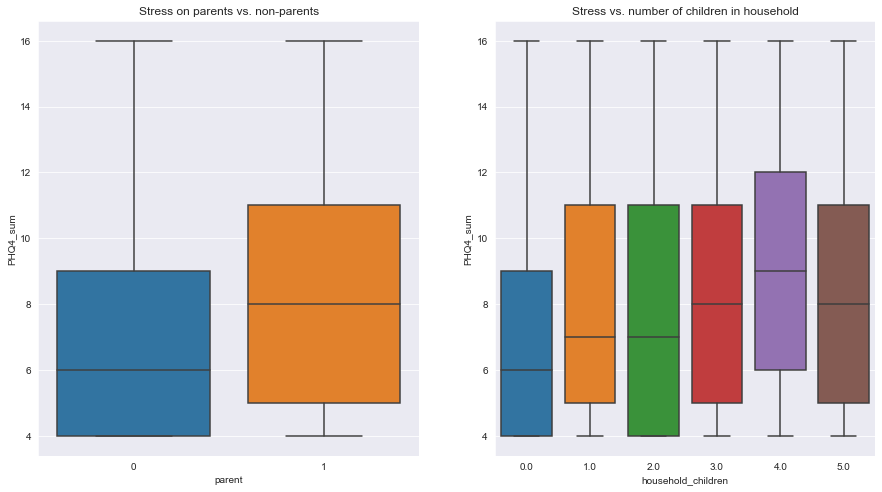

In [56]:
fig, ax = plt.subplots(1,2, figsize=(15, 8));
sns.boxplot(ax=ax[0], x='parent', y='PHQ4_sum', data=ucl_data);
ax[0].set_title("Stress on parents vs. non-parents");
sns.boxplot(ax=ax[1], x='household_children', y='PHQ4_sum', data=ucl_data);
ax[1].set_title("Stress vs. number of children in household");

#labels need to be changed later ie. "5 or more")

parents are more likely to be stressed than non parents

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [58]:
ucl_data.shape

(17166, 18)

In [83]:
ucl_data = pd.concat([ucl_data, pd.get_dummies(ucl_data['gender'])], axis=1)
ucl_data

,state,endtime,gender,age,household_size,household_children,child_age_1,child_age_2,child_age_3,child_age_4,child_age_5,cantril_ladder,PHQ4_1,PHQ4_2,PHQ4_3,PHQ4_4,PHQ4_sum,parent,Female,Male
4976,Georgia,30/04/2020 16:33,Male,40,3.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,4.0,2.0,1.0,3.0,10.0,1,0,1
4977,New Jersey,30/04/2020 16:31,Female,62,3.0,0.0,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,2.0,1.0,6.0,0,1,0
4978,Indiana,30/04/2020 16:32,Female,61,2.0,0.0,NaN,NaN,NaN,NaN,NaN,9.0,1.0,1.0,1.0,1.0,4.0,0,1,0
4979,Virginia,30/04/2020 16:34,Female,60,2.0,0.0,NaN,NaN,NaN,NaN,NaN,9.0,2.0,1.0,1.0,1.0,5.0,0,1,0
4980,Michigan,30/04/2020 16:34,Female,37,2.0,0.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.0,3.0,3.0,10.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31914,Florida,14/09/2021 22:46,Female,26,4.0,0.0,NaN,NaN,NaN,NaN,NaN,5.0,2.0,2.0,4.0,4.0,12.0,0,1,0
31919,New York,14/09/2021 16:32,Male,44,1.0,0.0,NaN,NaN,NaN,NaN,NaN,5.0,1.0,1.0,1.0,1.0,4.0,0,0,1
31920,Rhode Island,14/09/2021 23:30,Male,30,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,2.0,2.0,4.0,4.0,12.0,1,0,1
31923,Connecticut,16/09/2021 00:50,Female,37,4.0,2.0,1.0,0.0,0.0,0.0,0.0,8.0,3.0,1.0,3.0,3.0,10.0,1,1,0


In [134]:
y = ucl_data.PHQ4_sum
X = ucl_data[['household_size']]#'household_size', 'household_children', 'Female', 'Male', 'parent']] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [135]:
lr = LinearRegression().fit(X_train,y_train)

In [136]:
print(pd.DataFrame(zip(X_train.columns,lr.coef_)))
print('\nintercept:', lr.intercept_)
print('r2:', lr.score(X_test,y_test))

                0         1
0  household_size  0.346219

intercept: 6.448680764217995
r2: 0.020727366363842092


In [87]:
ucl_data.gender.value_counts()

Female    9154
Male      8012
Name: gender, dtype: int64

Text(0.5, 1.0, 'Not being able to stop or control worrying')

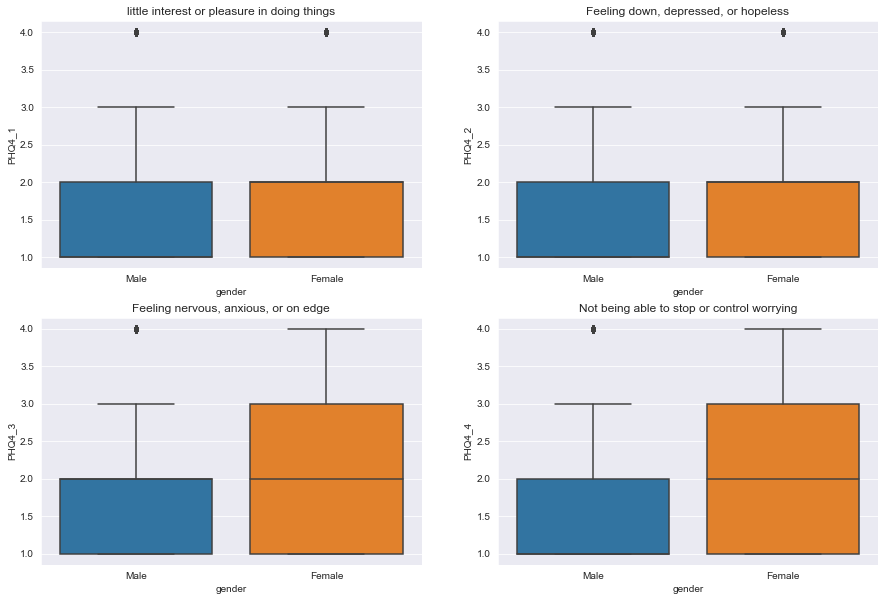

In [88]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(ax=axes[0,0], x= 'gender', y= 'PHQ4_1', data= ucl_data)
axes[0,0].set_title("little interest or pleasure in doing things")
sns.boxplot(ax=axes[0,1], x= 'gender', y= 'PHQ4_2', data= ucl_data)
axes[0,1].set_title("Feeling down, depressed, or hopeless")
sns.boxplot(ax=axes[1,0], x= 'gender', y= 'PHQ4_3', data= ucl_data)
axes[1,0].set_title("Feeling nervous, anxious, or on edge")
sns.boxplot(ax=axes[1,1], x= 'gender', y= 'PHQ4_4', data= ucl_data)
axes[1,1].set_title("Not being able to stop or control worrying")

 1. Not at all
 2. Several days
 3. More than half the days
 4. Nearly everyday
 
 Women are more likely to feel nervous, anxious, and worry more then men.
 

<AxesSubplot:xlabel='gender', ylabel='PHQ4_sum'>

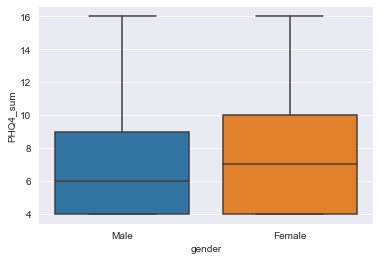

In [15]:
sns.boxplot(x = 'gender', y= 'PHQ4_sum', data= ucl_data)

# Stress vs. number dependencies

<AxesSubplot:xlabel='household_size', ylabel='cantril_ladder'>

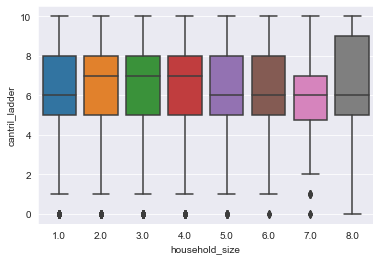

In [16]:
sns.boxplot(x='household_size', y= 'cantril_ladder', data=ucl_data)

<AxesSubplot:xlabel='household_size', ylabel='PHQ4_sum'>

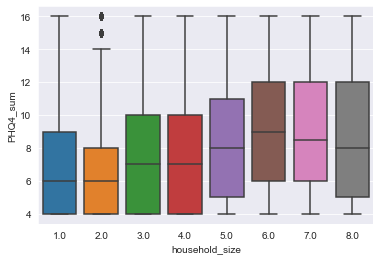

In [17]:
sns.boxplot(x= 'household_size', y= 'PHQ4_sum', data=ucl_data)

In [18]:
#household_children/(household_size-household_children) = children/adult ratio
ucl_data['children/total_size ratio'] = ucl_data.apply(lambda x: x.household_children/x.household_size, axis=1)

In [19]:
male_df = ucl_data[ucl_data['gender']== 'Male']
female_df = ucl_data[ucl_data['gender']== 'Female']
female_df

,state,endtime,gender,age,household_size,household_children,child_age_1,child_age_2,child_age_3,child_age_4,child_age_5,cantril_ladder,PHQ4_1,PHQ4_2,PHQ4_3,PHQ4_4,PHQ4_sum,parent,children/total_size ratio
4977,New Jersey,30/04/2020 16:31,Female,62,3.0,0.0,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,2.0,1.0,6.0,0,0.000000
4978,Indiana,30/04/2020 16:32,Female,61,2.0,0.0,NaN,NaN,NaN,NaN,NaN,9.0,1.0,1.0,1.0,1.0,4.0,0,0.000000
4979,Virginia,30/04/2020 16:34,Female,60,2.0,0.0,NaN,NaN,NaN,NaN,NaN,9.0,2.0,1.0,1.0,1.0,5.0,0,0.000000
4980,Michigan,30/04/2020 16:34,Female,37,2.0,0.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.0,3.0,3.0,10.0,0,0.000000
4984,Pennsylvania,30/04/2020 16:35,Female,32,3.0,1.0,NaN,NaN,NaN,NaN,NaN,9.0,1.0,1.0,1.0,1.0,4.0,1,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31900,Louisiana,14/09/2021 11:07,Female,38,2.0,0.0,NaN,NaN,NaN,NaN,NaN,5.0,3.0,3.0,3.0,3.0,12.0,0,0.000000
31909,Michigan,14/09/2021 13:13,Female,21,1.0,0.0,NaN,NaN,NaN,NaN,NaN,8.0,1.0,2.0,1.0,1.0,5.0,0,0.000000
31914,Florida,14/09/2021 22:46,Female,26,4.0,0.0,NaN,NaN,NaN,NaN,NaN,5.0,2.0,2.0,4.0,4.0,12.0,0,0.000000
31923,Connecticut,16/09/2021 00:50,Female,37,4.0,2.0,1.0,0.0,0.0,0.0,0.0,8.0,3.0,1.0,3.0,3.0,10.0,1,0.500000


In [20]:
female_count_df = female_df.PHQ4_sum.value_counts(normalize=True).rename_axis('PHQ4_sum').reset_index(name='counts')
male_count_df = male_df.PHQ4_sum.value_counts(normalize=True).rename_axis('PHQ4_sum').reset_index(name='counts')
#print(female_count_df['female_counts'].sum())
female_count_df['gender'] = 'female'
male_count_df['gender'] = 'male'
count_df = pd.concat([male_count_df, female_count_df])
count_df

,PHQ4_sum,counts,gender
0,4.0,0.367955,male
1,5.0,0.095382,male
2,6.0,0.091262,male
3,8.0,0.091019,male
4,7.0,0.074052,male
5,10.0,0.050297,male
6,12.0,0.047873,male
7,9.0,0.046297,male
8,11.0,0.038904,male
9,16.0,0.031875,male


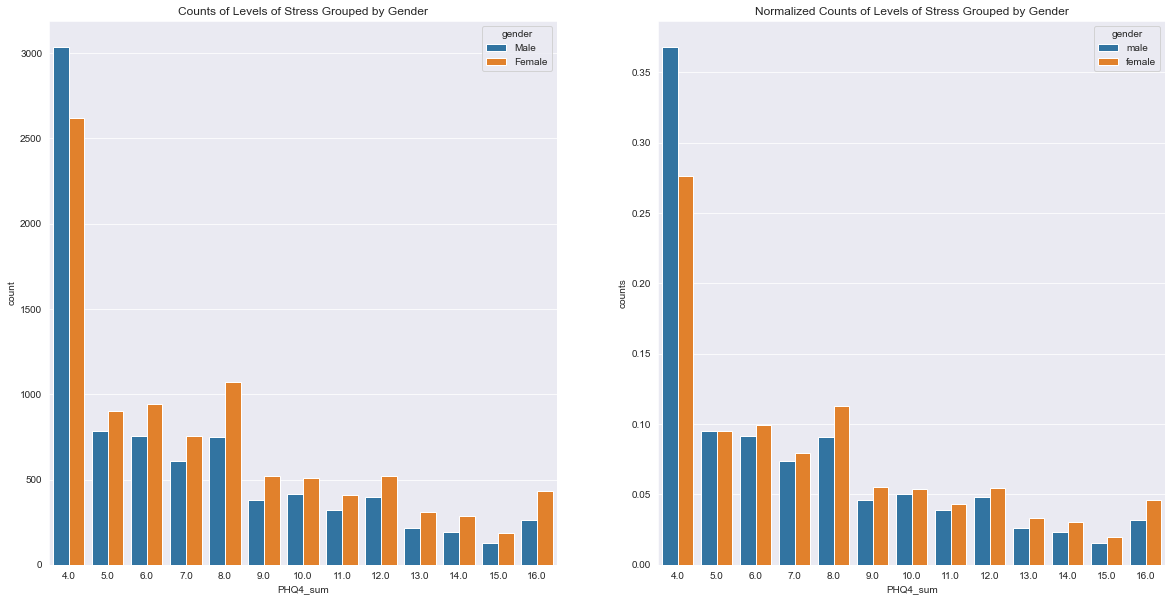

In [21]:
fig, axes2 = plt.subplots(1, 2, figsize=(20, 10));
sns.countplot(ax=axes2[0], x='PHQ4_sum', hue="gender", dodge=True, data=ucl_data);
axes2[0].set_title('Counts of Levels of Stress Grouped by Gender');
sns.barplot(x='PHQ4_sum', y='counts', hue='gender', dodge=True, data=count_df);
axes2[1].set_title('Normalized Counts of Levels of Stress Grouped by Gender');

Text(0.5, 1.0, 'Stress Sum for Female Population')

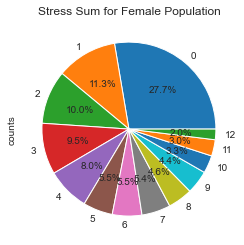

In [140]:
female_count_df['counts'].plot.pie(autopct="%.1f%%", subplots=True);
plt.title('Stress Sum for Female Population')

Text(0.5, 1.0, 'Stress Sum for Male Population')

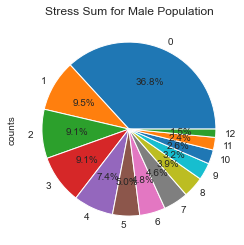

In [141]:
male_count_df['counts'].plot.pie(autopct="%.1f%%", subplots=True);
plt.title('Stress Sum for Male Population')

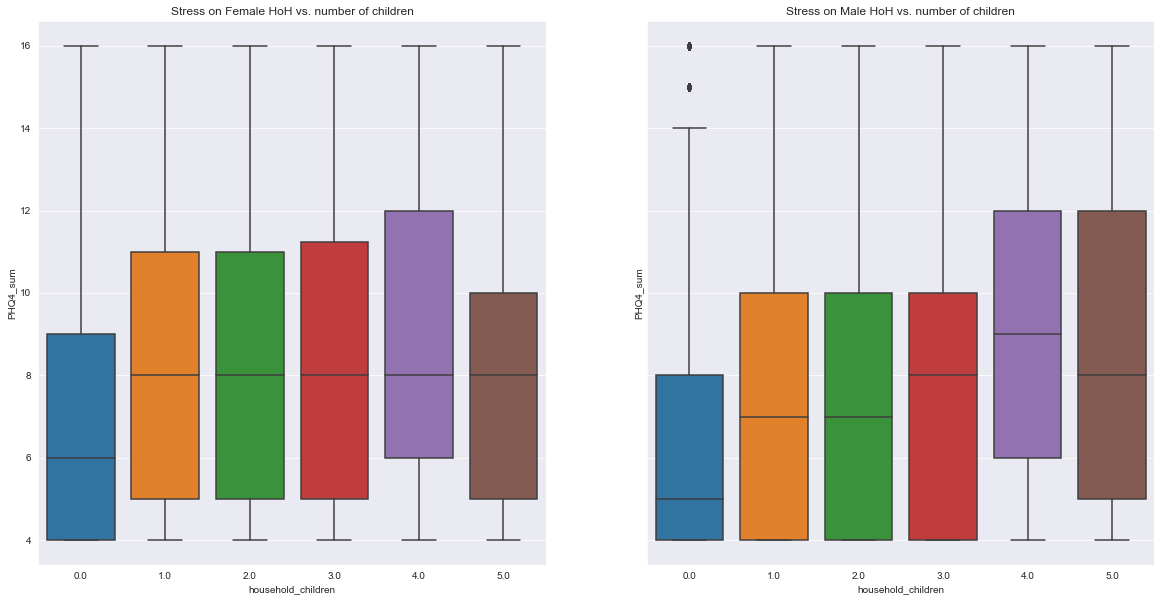

In [22]:
fig, axes3 = plt.subplots(1, 2, figsize=(20, 10), sharey=True);
sns.boxplot(ax=axes3[0], x= "household_children", y="PHQ4_sum", data=female_df);
axes3[0].set_title('Stress on Female HoH vs. number of children');
sns.boxplot(ax=axes3[1], x="household_children", y= "PHQ4_sum", data=male_df);
axes3[1].set_title('Stress on Male HoH vs. number of children');

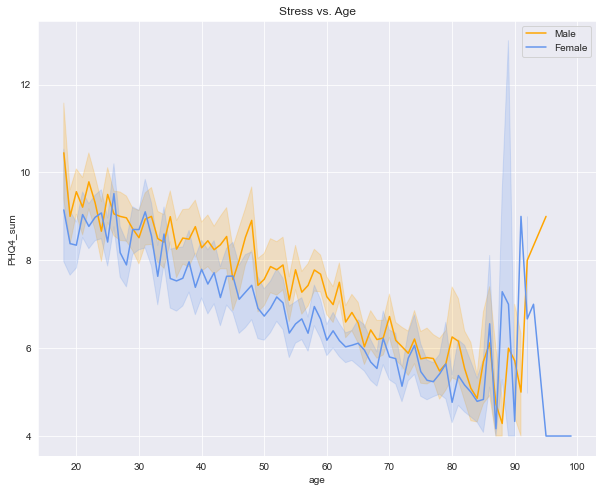

In [130]:
plt.figure(figsize=(10,8))
sns.lineplot(x= "age", y="PHQ4_sum", data=female_df, color='orange');
sns.lineplot(x= "age", y="PHQ4_sum", data=male_df, color='cornflowerblue');
plt.title('Stress vs. Age')
plt.legend(labels=["Male","Female"])

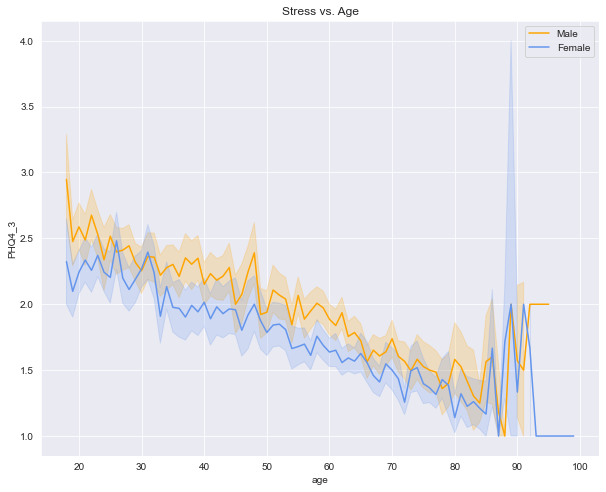

In [128]:
plt.figure(figsize=(10,8))
sns.lineplot(x= "age", y="PHQ4_3", data=female_df, color='orange');
sns.lineplot(x= "age", y="PHQ4_3", data=male_df, color='cornflowerblue');
plt.title('Stress vs. Age')
plt.legend(labels=["Male","Female"])